In [1]:
#Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Data
train_data = pd.read_csv('test-data.csv')
test_data = pd.read_csv('train-data.csv')

In [3]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [4]:
train_data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


In [5]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [6]:
train_data.isnull().sum().sum()

1083

In [21]:
#Drop Target and Index Columns from train data
train_data.columns.drop(['New_Price'])
train_data.columns.drop(['Unnamed: 0'])

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price'],
      dtype='object')

In [8]:
#Group numerical and categorical features
num_cols = []
cat_cols = []

for col in train_data.columns:
    if train_data[col].dtype in('int64', 'float64'):
        num_cols.append(train_data[col].name)
    else:
        cat_cols.append(train_data[col].name)

In [9]:
print(num_cols)

['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Seats']


In [18]:
#Create new data frames using num and cat columns 
num_train_data = train_data[num_cols]
cat_train_data = train_data[cat_cols]

num_test_data = test_data[num_cols]
cat_test_data = test_data[cat_cols]

In [19]:
num_test_data.columns

Index(['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Seats'], dtype='object')

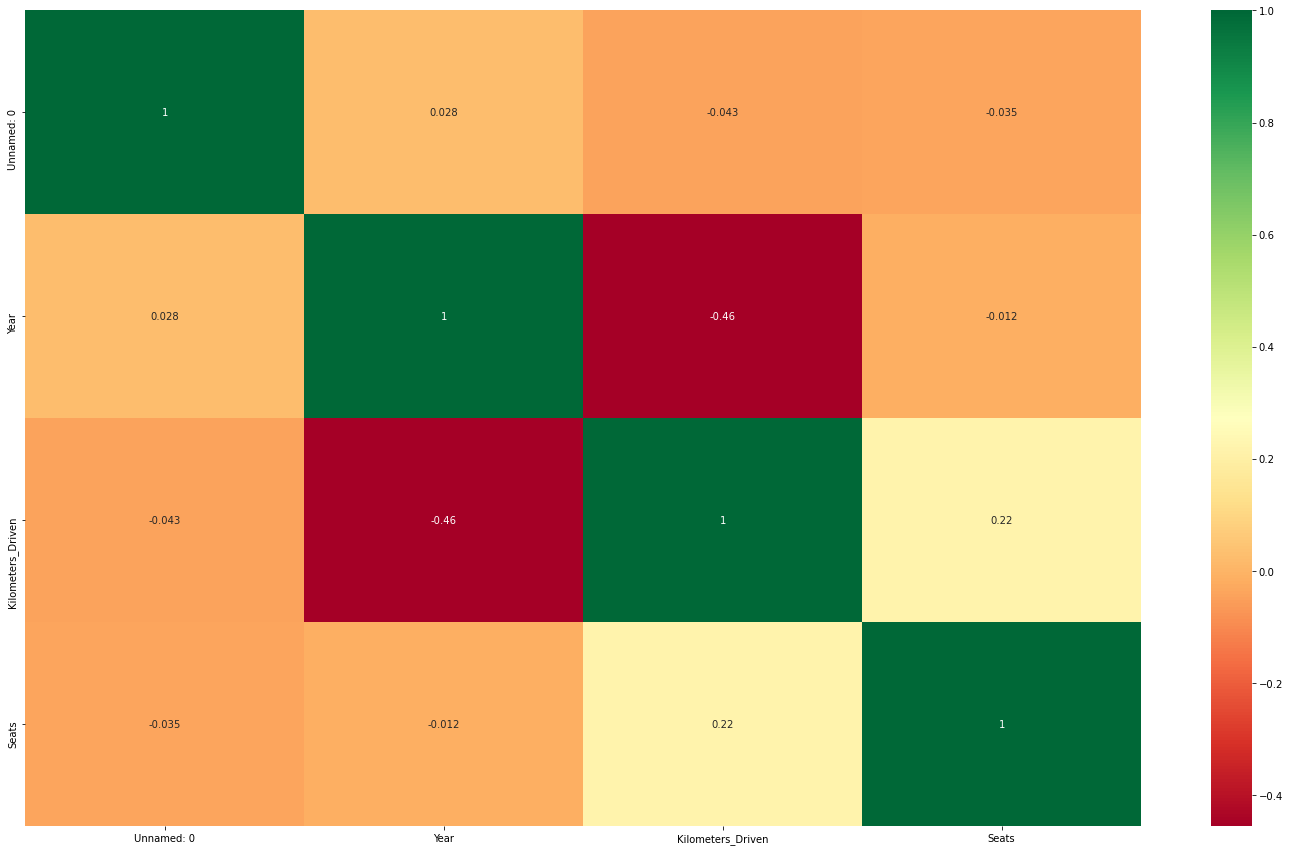

In [26]:
#Get the correlation of all the features of the data set
corr_matrix = num_train_data.corr()
top_corr_features = corr_matrix.index

#Plot Heatmap
plt.figure(figsize=(25,15))
g = sns.heatmap(data=num_train_data[top_corr_features].corr(), annot=True, cmap = 'RdYlGn')